In [1]:
import torch

from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10, MNIST
from torchvision.transforms import Compose, ToTensor, Normalize

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

from TNN import Mining, Model
from TNN.Plot import scatter
from TNN.Loss_Fn import triplet_loss

In [2]:
device = torch.device('cuda:1')
tsne = TSNE(random_state=0)
batch_size_train = 256

In [3]:
train_loader = DataLoader(CIFAR10('./CIFAR10/', train=True, download=True,
                                transform=Compose([ToTensor(),Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                               ),batch_size=batch_size_train, shuffle=True)
test_loader = DataLoader(CIFAR10('./CIFAR10/', train=False, download=True,
                                transform=Compose([ToTensor(),Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                               ),batch_size=batch_size_train, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
x_test, y_test = next(iter(test_loader))
x_test = x_test.to(device)
y_test = y_test.to(device)

In [5]:
x_train, y_train = next(iter(train_loader))
x_train = x_train.to(device)
y_train = y_train.to(device)

In [6]:
train_tsne_embeds = tsne.fit_transform(x_train.flatten(1).cpu().detach().numpy())
test_tsne_embeds = tsne.fit_transform(x_test.flatten(1).cpu().detach().numpy())

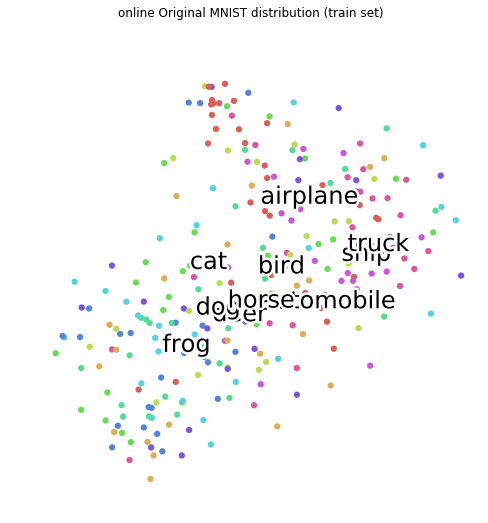

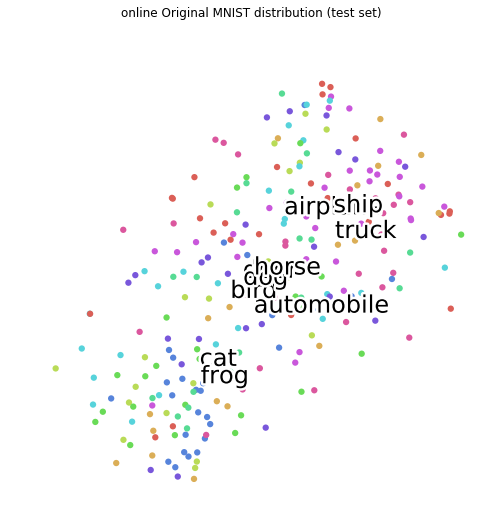

In [7]:
scatter(train_tsne_embeds, y_train.cpu().numpy(), subtitle=f'online Original MNIST distribution (train set)', dataset='CIFAR10')
scatter(test_tsne_embeds, y_test.cpu().numpy(), subtitle=f'online Original MNIST distribution (test set)', dataset='CIFAR10')

In [8]:
model = Model.TNN_CIFAR10(input_shape=x_train.shape[1:], output_size=32)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [9]:
margin = 1e-2
for epoch in range(300):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss, pos_triplet, valid_triplet = Mining.online_mine_all(labels, outputs, margin=margin, squared=True, device=device)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%2 == 0:
            print(f"At epoches = {epoch}, i = {i}, loss = {loss:.5f}, trainable_triplet = {pos_triplet}, total_triplets = {valid_triplet}"
                  , end='\r')
    epoch_loss = running_loss / len(train_loader)
    
    print(" "*100)
    print(f"At epoches = {epoch}, epoch_loss = {epoch_loss}")
print('Finished Training')

                                                                                                    
At epoches = 0, epoch_loss = 0.010124020915174363
                                                                                                    
At epoches = 1, epoch_loss = 0.009925691833795637
                                                                                                    
At epoches = 2, epoch_loss = 0.009813529149420103
                                                                                                    
At epoches = 3, epoch_loss = 0.009719321081338793
                                                                                                    
At epoches = 4, epoch_loss = 0.009623041001091502
                                                                                                    
At epoches = 5, epoch_loss = 0.00955434791667729
                                                                                               

                                                                                                    
At epoches = 54, epoch_loss = 0.006233602439110376
                                                                                                    
At epoches = 55, epoch_loss = 0.006178987069929741
                                                                                                    
At epoches = 56, epoch_loss = 0.006093764948487586
                                                                                                    
At epoches = 57, epoch_loss = 0.0060243990429087865
                                                                                                    
At epoches = 58, epoch_loss = 0.0059492334970558175
                                                                                                    
At epoches = 59, epoch_loss = 0.005873007200924414
                                                                                      

                                                                                                    
At epoches = 108, epoch_loss = 0.004385375067335078
                                                                                                    
At epoches = 109, epoch_loss = 0.0037497486812252626
                                                                                                    
At epoches = 110, epoch_loss = 0.003417945526331207
                                                                                                    
At epoches = 111, epoch_loss = 0.004018715832249394
                                                                                                    
At epoches = 112, epoch_loss = 0.003302509422480528
                                                                                                    
At epoches = 113, epoch_loss = 0.003956109894753187
                                                                                 

                                                                                                    
At epoches = 161, epoch_loss = 0.003072118400881181
                                                                                                    
At epoches = 162, epoch_loss = 0.0031355495531378047
                                                                                                    
At epoches = 163, epoch_loss = 0.0031111871328309408
                                                                                                    
At epoches = 164, epoch_loss = 0.004203969090036592
                                                                                                    
At epoches = 165, epoch_loss = 0.0034148328253353127
                                                                                                    
At epoches = 166, epoch_loss = 0.004746826846100276
                                                                               

                                                                                                    
At epoches = 214, epoch_loss = 0.0034073194814370753
                                                                                                    
At epoches = 215, epoch_loss = 0.003386721608338269
                                                                                                    
At epoches = 216, epoch_loss = 0.003264401938970562
                                                                                                    
At epoches = 217, epoch_loss = 0.0033789946874651145
                                                                                                    
At epoches = 218, epoch_loss = 0.003428031088741572
                                                                                                    
At epoches = 219, epoch_loss = 0.0034074952157109747
                                                                               

                                                                                                    
At epoches = 267, epoch_loss = 0.0036662533963621805
                                                                                                    
At epoches = 268, epoch_loss = 0.003889064618733198
                                                                                                    
At epoches = 269, epoch_loss = 0.003621011317294205
                                                                                                    
At epoches = 270, epoch_loss = 0.0036240841994983884
                                                                                                    
At epoches = 271, epoch_loss = 0.003567571541810009
                                                                                                    
At epoches = 272, epoch_loss = 0.003715771027099417
                                                                                

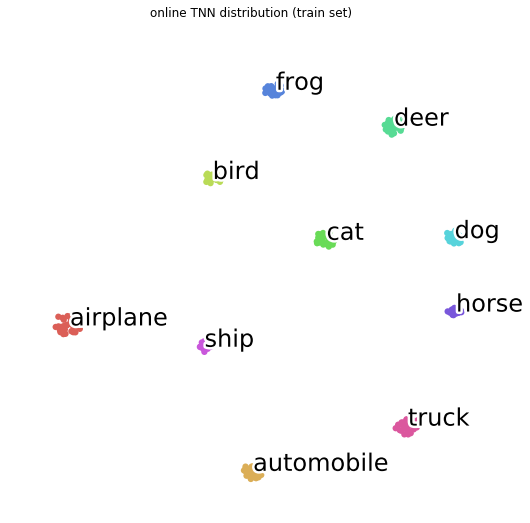

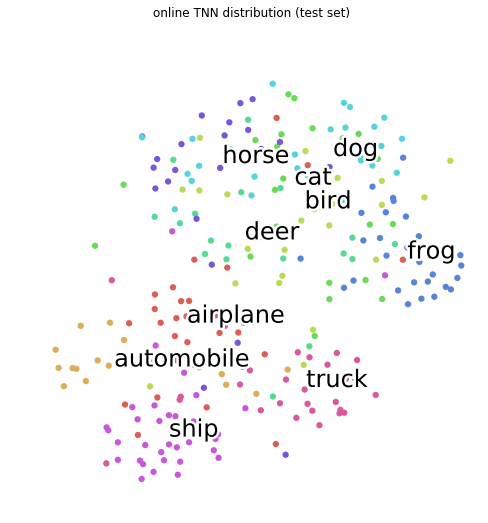

In [11]:
train_outputs = model(x_train)
test_outputs = model(x_test)
train_tsne_embeds = tsne.fit_transform(train_outputs.cpu().detach().numpy())
test_tsne_embeds = tsne.fit_transform(test_outputs.cpu().detach().numpy())

scatter(train_tsne_embeds, y_train.cpu().numpy(), subtitle=f'online TNN distribution (train set)', dataset='CIFAR10')
scatter(test_tsne_embeds, y_test.cpu().numpy(), subtitle=f'online TNN distribution (test set)', dataset='CIFAR10')